# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress
from pprint import pprint


# Import the OpenWeatherMap API key
from api_Keys import geoapify_key
from api_Keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&lang=PT&units=metric'

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # city_date = city_weather['timezone']
    
        # Convert the Unix timestamp to a datetime object
        timestamp = city_weather['dt']
              
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                        #   "Date": city_date})
                          "Date": timestamp})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | anan
Processing Record 3 of Set 1 | nar'yan-mar
Processing Record 4 of Set 1 | malango
Processing Record 5 of Set 1 | karratha
Processing Record 6 of Set 1 | kapa'a
Processing Record 7 of Set 1 | coari
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | cockburn town
Processing Record 11 of Set 1 | carutapera
Processing Record 12 of Set 1 | manuel ojinaga
City not found. Skipping...
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | campbellton
Processing Record 16 of Set 1 | cosala
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | el burgo de osma
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 21 of Set 1 | p

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,18.44,82,0,3.09,US,1707835703
1,anan,33.9167,134.6500,6.88,82,0,1.70,JP,1707835703
2,nar'yan-mar,67.6713,53.0870,-29.38,98,71,3.58,RU,1707835704
3,malango,-2.9627,119.9001,20.78,98,100,0.66,ID,1707835704
4,karratha,-20.7377,116.8463,27.13,79,5,4.26,AU,1707835705


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,18.44,82,0,3.09,US,1707835703
1,anan,33.9167,134.6500,6.88,82,0,1.70,JP,1707835703
2,nar'yan-mar,67.6713,53.0870,-29.38,98,71,3.58,RU,1707835704
3,malango,-2.9627,119.9001,20.78,98,100,0.66,ID,1707835704
4,karratha,-20.7377,116.8463,27.13,79,5,4.26,AU,1707835705


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

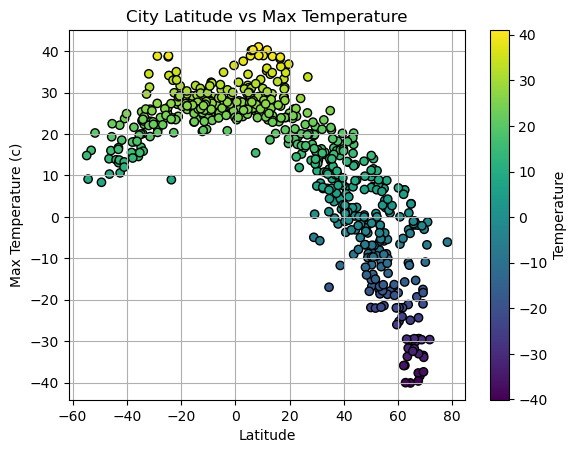

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', c= city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temperature')
plt.grid('True')
clb = plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (c)')
clb.set_label('Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

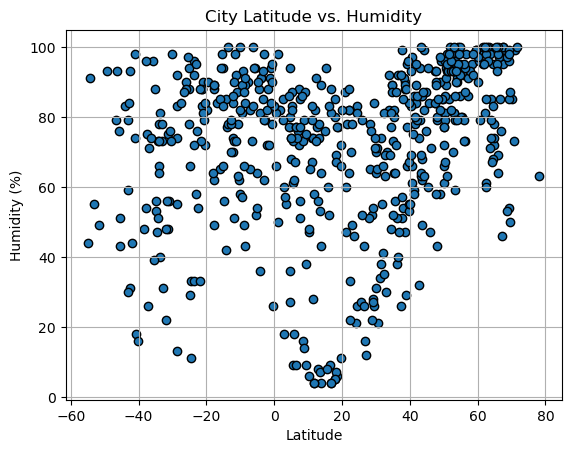

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')
plt.title('City Latitude vs. Humidity')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

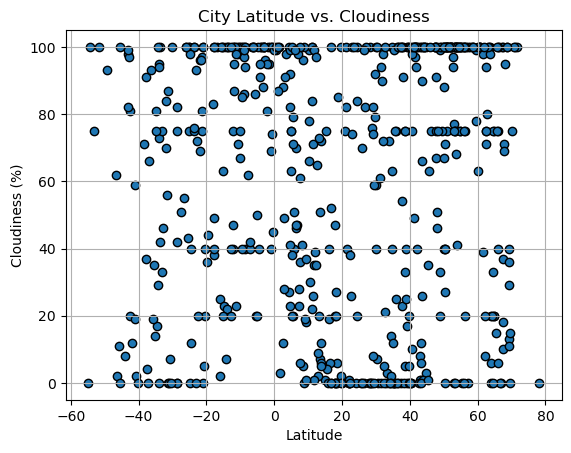

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.grid('True')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

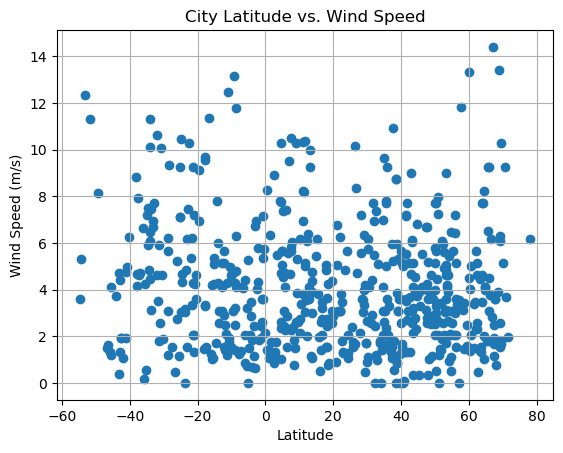

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression (x_values, y_values, x_label, y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.9),fontsize=15,color="red")
    # plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red", xytext=(7, 45), textcoords='offset points')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'The r-value is:{rvalue}')

    plt.show()


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
North_hemisphere_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
North_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,18.44,82,0,3.09,US,1707835703
1,anan,33.9167,134.6500,6.88,82,0,1.70,JP,1707835703
2,nar'yan-mar,67.6713,53.0870,-29.38,98,71,3.58,RU,1707835704
5,kapa'a,22.0752,-159.3190,19.18,82,0,3.09,US,1707835705
7,longyearbyen,78.2186,15.6401,-6.09,63,0,6.17,SJ,1707835706


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
South_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
South_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,malango,-2.9627,119.9001,20.78,98,100,0.66,ID,1707835704
4,karratha,-20.7377,116.8463,27.13,79,5,4.26,AU,1707835705
6,coari,-4.0850,-63.1414,28.05,81,91,2.86,BR,1707835706
10,carutapera,-1.1950,-46.0200,25.50,91,100,1.94,BR,1707835708
12,avarua,-21.2078,-159.7750,24.03,88,81,2.06,CK,1707835709


###  Temperature vs. Latitude Linear Regression Plot

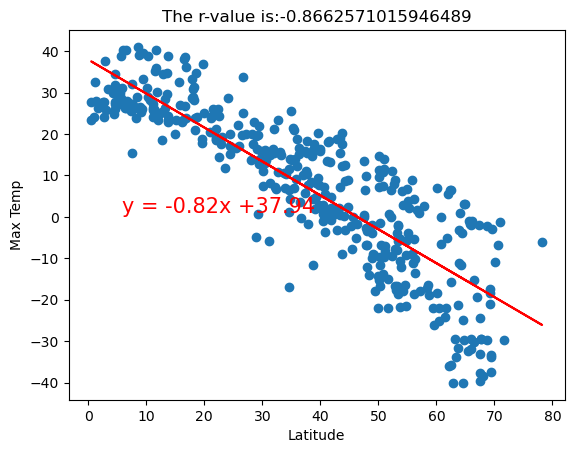

In [18]:
# Linear regression on Northern Hemisphere
plot_linear_regression(North_hemisphere_df['Lat'],North_hemisphere_df['Max Temp'],'Latitude','Max Temp')

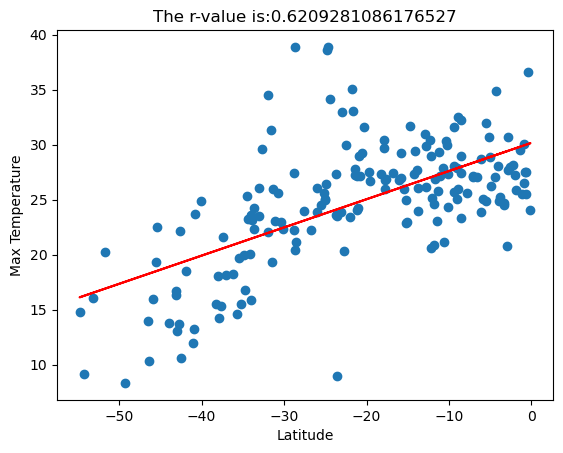

In [19]:
# Linear regression on Southern Hemisphere
plot_linear_regression(South_hemisphere_df['Lat'], South_hemisphere_df['Max Temp'],'Latitude','Max Temperature')

**Discussion about the linear relationship:** 
<p>In the Northern hemisphere there is a strong negative correlation between latitude and temperature, as the latitudes get higher, the temperature drops.
<p>In the southern hemisphere there is a positive relationship; as the latitude increases, so does the temperature. 

### Humidity vs. Latitude Linear Regression Plot

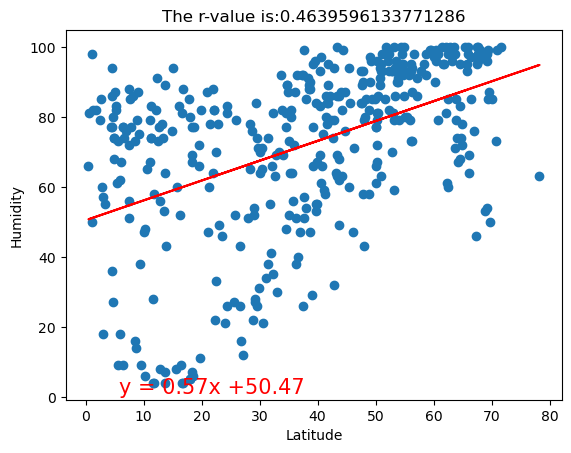

In [20]:
# Northern Hemisphere
plot_linear_regression(North_hemisphere_df['Lat'], North_hemisphere_df['Humidity'],'Latitude','Humidity')

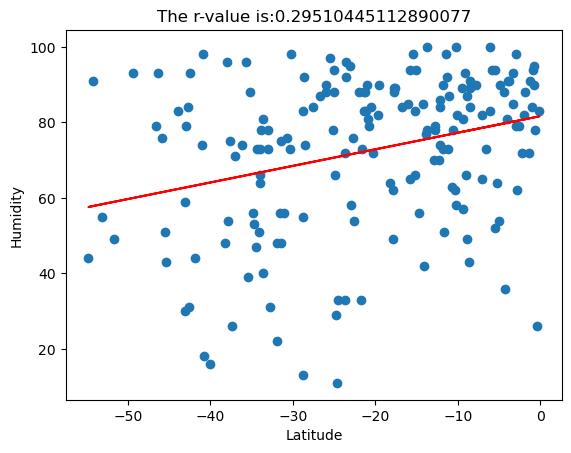

In [21]:
# Southern Hemisphere
plot_linear_regression(South_hemisphere_df['Lat'], South_hemisphere_df['Humidity'],'Latitude','Humidity')

**Discussion about the linear relationship:** 
<p> In the Northern hemisphere, there is a moderate correlation between latitude and humidity. Humidity seems to become higher from the latitude of 35 and upwards and there are just few instances of very low humidity at higher latitudes.
The relationship seems to become slightly stronger at higher altitudes. 
<p> There is a low correlation in the Southern hemisphere between latitude and humidity. There seems to be mostly high humidity at most latitudes.  

### Cloudiness vs. Latitude Linear Regression Plot

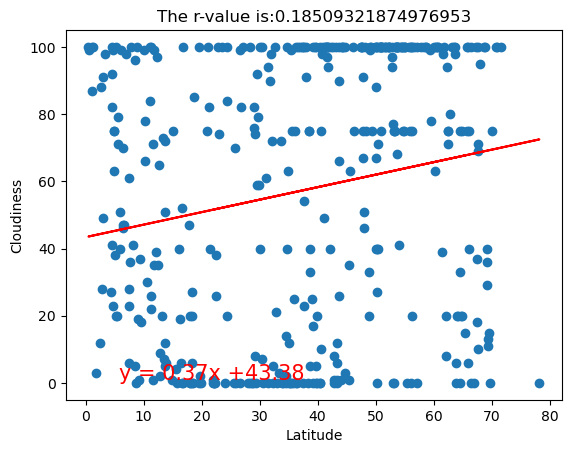

In [22]:
# Northern Hemisphere
plot_linear_regression(North_hemisphere_df['Lat'], North_hemisphere_df['Cloudiness'],'Latitude','Cloudiness')

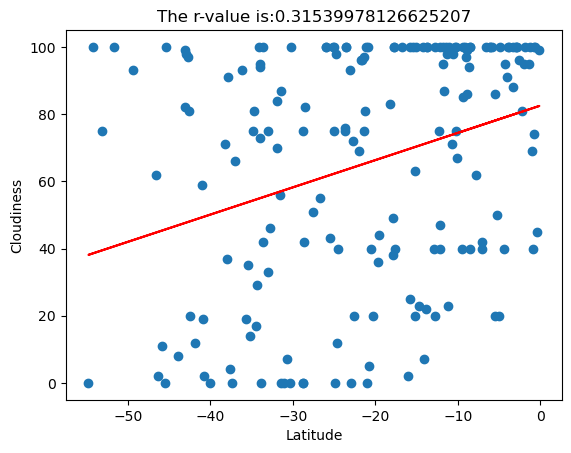

In [23]:
# Southern Hemisphere
plot_linear_regression(South_hemisphere_df['Lat'],South_hemisphere_df['Cloudiness'],'Latitude','Cloudiness')

**Discussion about the linear relationship:** 
<p> In both the Northern and Southern hemispheres there is little to no corerlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

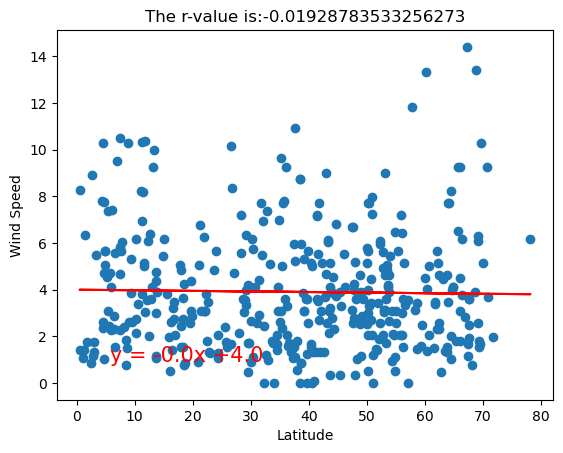

In [24]:
# Northern Hemisphere
plot_linear_regression(North_hemisphere_df['Lat'], North_hemisphere_df['Wind Speed'], 'Latitude','Wind Speed')

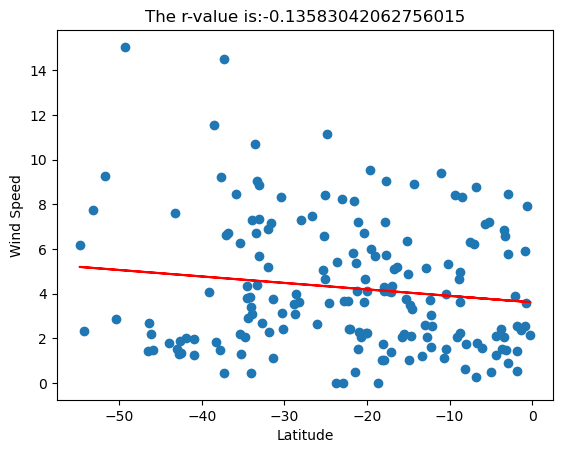

In [117]:
# Southern Hemisphere
plot_linear_regression(South_hemisphere_df['Lat'],South_hemisphere_df['Wind Speed'],'Latitude','Wind Speed')

**Discussion about the linear relationship:** 
<p> In both the Northern and Southern hemispheres there is little to no corerlation between latitude and cloudiness.  
<p> However there is a lot of occurence of low wind speeds in the Northern hemisphere across all latitudes. There is an even distribution in the southern hemisphere.